# Task 1: psudo dataset

In [18]:
from sklearn.datasets import make_classification
data,_ = make_classification(
    n_samples=1000,
    n_features=2,
    n_classes=3,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4,
    class_sep=2
)

# Task 2: K-means

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, 
                init='k-means++',
                max_iter=1000,
                n_init=10)
# Fitting data to kmeans
kmeans.fit(data)
# Predict clusters class for each data point
y_pred = kmeans.predict(data)

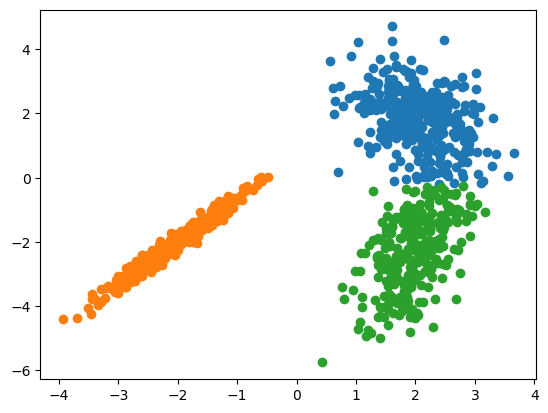

In [20]:
from numpy import unique,where
from matplotlib import pyplot as plt
# Get all of the unique clusters
kmean_clusters = unique(y_pred)
for cluster in kmean_clusters:
    index = where(y_pred==cluster)
    plt.scatter(data[index,0],data[index,1])
plt.show()

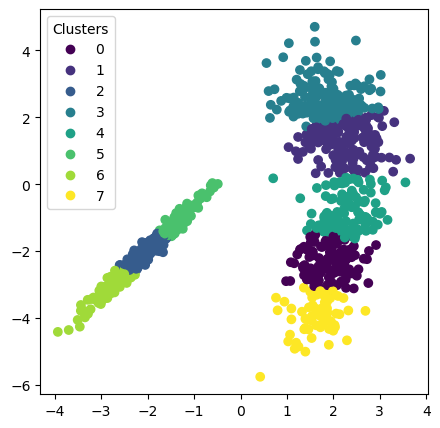

In [29]:
# Visualize results:
kmean_clusters = unique(y_pred)

fig,ax = plt.subplots(1,1,figsize = (5,5))
scatter = ax.scatter(data[:,0],data[:,1],c = y_pred)

ax.legend(*scatter.legend_elements(),loc = 'upper left',title="Clusters")


## Without provide number of clusters


In [22]:
kmeans = KMeans(
                init='k-means++',
                max_iter=1000,
                n_init=10)
# Fitting data to kmeans
kmeans.fit(data)
# Predict clusters class for each data point
y_pred = kmeans.predict(data)

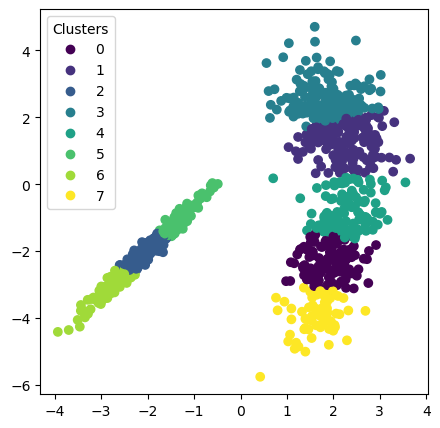

In [23]:
# Visualize results:
kmean_clusters = unique(y_pred)

fig,ax = plt.subplots(1,1,figsize = (5,5))
scatter = ax.scatter(data[:,0],data[:,1],c = y_pred)

ax.legend(*scatter.legend_elements(),loc = 'upper left',title="Clusters")


# Task 3: MeanShift

In [24]:
from sklearn.cluster import MeanShift
mean_shift = MeanShift() 
# Fitting data to mean_shift
mean_shift.fit(data)
# Predict clusters class for each data point
pred_meanshift = mean_shift.predict(data)

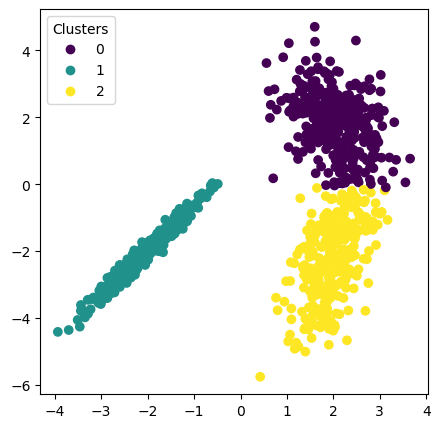

In [25]:
# Visualize results:
kmean_clusters = unique(pred_meanshift)

fig,ax = plt.subplots(1,1,figsize = (5,5))
scatter = ax.scatter(data[:,0],data[:,1],c = pred_meanshift)

ax.legend(*scatter.legend_elements(),loc = 'upper left',title="Clusters")


# Task 4: DBSCAN

In [27]:
from sklearn.cluster import DBSCAN
model_DBSCAN = DBSCAN(eps=0.25,min_samples=9) 
# Fitting data to model DBSCAN
model_DBSCAN.fit(data)
# Predict clusters class for each data point
pred_DBSCAN = model_DBSCAN.labels_

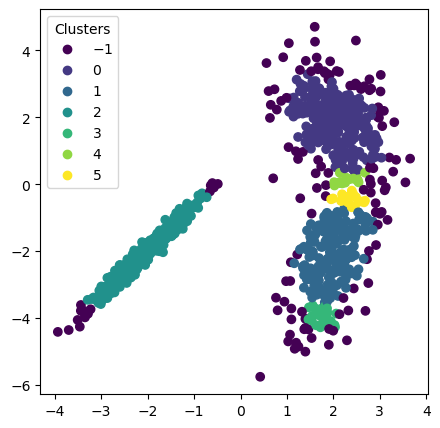

In [28]:
# Visualize results:
kmean_clusters = unique(pred_DBSCAN)

fig,ax = plt.subplots(1,1,figsize = (5,5))
scatter = ax.scatter(data[:,0],data[:,1],c = pred_DBSCAN)

ax.legend(*scatter.legend_elements(),loc = 'upper left',title="Clusters")


# Task 5: Fuzzy C-means FCM


In [41]:
import skfuzzy as fuzz
import numpy as np
n_clusters = 3
# Fuzzy c-means algorithm
cntr,u,u0,d,j,p,fpc = fuzz.cluster.cmeans(data.T,n_clusters,2,error = 0.005,maxiter = 1000)
# Assign each data point to the cluster with the highest membership value
cluster_membership = np.argmax(u,axis = 0)

In [42]:
print(u)

[[0.74182998 0.03145424 0.40465071 ... 0.0267259  0.03405557 0.24158551]
 [0.08516894 0.94790993 0.49940306 ... 0.01281778 0.95196469 0.69633699]
 [0.17300108 0.02063583 0.09594623 ... 0.96045632 0.01397974 0.06207751]]


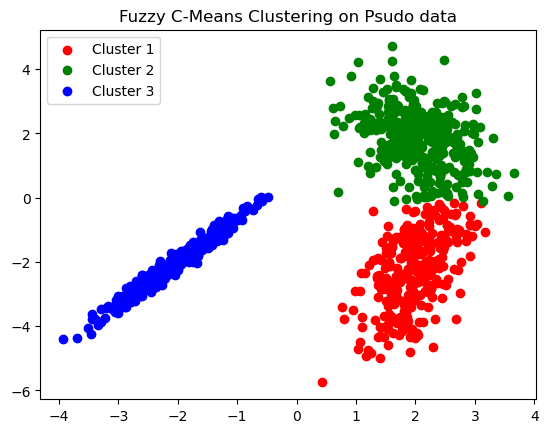

In [44]:
# Plotting the results
fig, ax = plt.subplots()
colors = ['r', 'g', 'b']
for j in range(n_clusters):
    ax.scatter(data[cluster_membership == j, 0], data[cluster_membership == j, 1],
               c=colors[j], label=f'Cluster {j + 1}', marker='o')

ax.legend()

plt.title('Fuzzy C-Means Clustering on Psudo data')
plt.show()

Above is our test data. We see three distinct blobs. However, what would happen if we didn’t know how many clusters we should expect? Perhaps if the data were not so clearly clustered?

Let’s try clustering our data several times, with between 2 and 10 clusters.

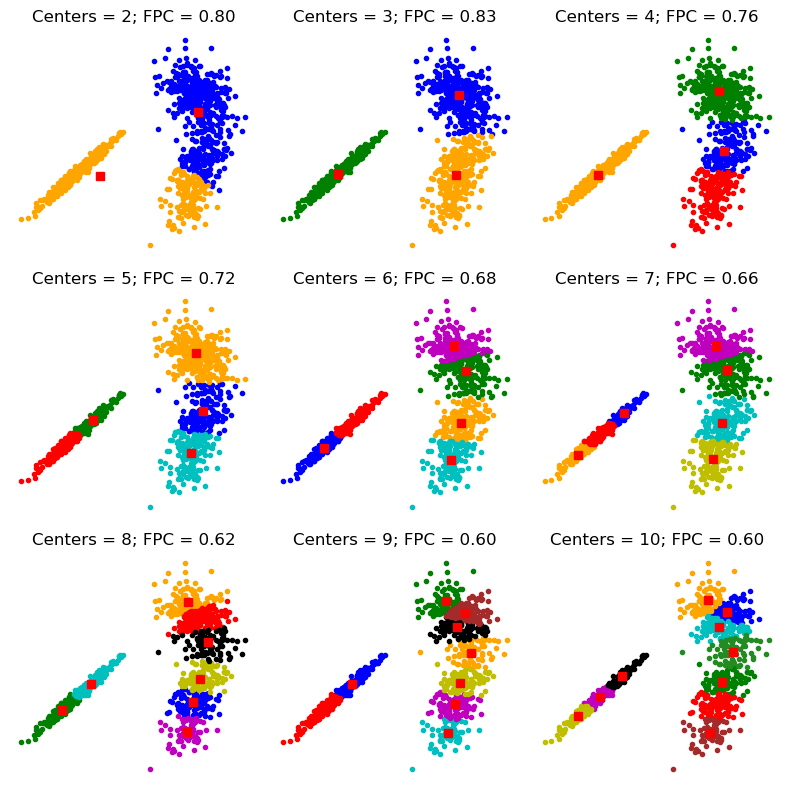

In [47]:
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data.T, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(data[cluster_membership == j,0],
                data[cluster_membership == j,1], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()